## Linear Regression (Sequential Model)
Example code taken from Keras Tutorial: [Keras Tutorial for Beginners with Python: Neural Network EXAMPLE](https://www.guru99.com/keras-tutorial.html)

Linear regression model is initialized with weights w: -1.63, b: 0.00
Linear regression model is trained to have weight w: 3.65, b: 0.65


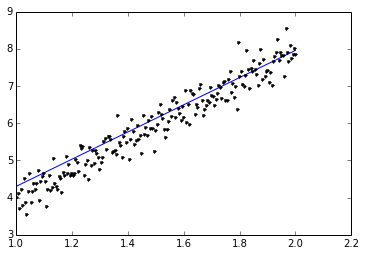

In [26]:
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt 
 
x = data = np.linspace(1,2,200)
y = x*4 + np.random.randn(*x.shape) * 0.3

model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

weights = model.layers[0].get_weights()
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weights w: %.2f, b: %.2f' % (w_init, b_init)) 


model.fit(x,y, batch_size=1, nb_epoch=40, shuffle=False, verbose=False)

weights = model.layers[0].get_weights()
w_final = weights[0][0][0]
b_final = weights[1][0]
print('Linear regression model is trained to have weight w: %.2f, b: %.2f' % (w_final, b_final))

predict = model.predict(data)

plt.plot(data, predict, 'b', data , y, 'k.')
plt.show()

## Using MNIST handwriting digit database
Example code taken from Keras Tutorial: [The Ultimate Beginner’s Guide to Deep Learning in Python](https://elitedatascience.com/keras-tutorial-deep-learning-in-python)

In [ ]:
# Import libraries and modules
import numpy as np
np.random.seed(314159)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
# Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 
# Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
 
# Define model architecture
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=2) #update the progress after each epoch
 
# Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)